In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-prices-dataset/Bitcoin.csv


## Reading the dataset ##

In [2]:
df = pd.read_csv('../input/bitcoin-prices-dataset/Bitcoin.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df.drop("Adj Close", inplace =True, axis= 1)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [6]:
df.info

<bound method DataFrame.info of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2678  2022-01-16  43172.039063  43436.808594  42691.023438  43113.878906   
2679  2022-01-17  43118.121094  43179.390625  41680.320313  42250.550781   
2680  2022-01-18  42250.074219  42534.402344  41392.214844  42375.632813   
2681  2022-01-19  42374.039063  42478.304688  41242.914063  41744.328125   
2682  2022-01-20  41736.527344  42034.734375  41724.464844  41933.546875   

           Volume  
0        21056800  
1        344832

### Checking if any value of the Data set is Null ###

In [7]:
df.isnull()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2678,False,False,False,False,False,False
2679,False,False,False,False,False,False
2680,False,False,False,False,False,False
2681,False,False,False,False,False,False


In [8]:
df["Date"] = pd.to_datetime(df["Date"])  

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [10]:
import matplotlib.pyplot as plt

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [12]:
import matplotlib.pyplot as plt 

### Identifying The Bull and Bear Trends ###

In [13]:
df["Rolling mean 50"] = df["Close"].rolling(window = 50).mean()
df["Rolling mean 200"] = df["Close"].rolling(window = 200).mean()

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Rolling mean 50,Rolling mean 200
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,NaN,NaN


In [15]:
df.tail

<bound method NDFrame.tail of            Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
2678 2022-01-16  43172.039063  43436.808594  42691.023438  43113.878906   
2679 2022-01-17  43118.121094  43179.390625  41680.320313  42250.550781   
2680 2022-01-18  42250.074219  42534.402344  41392.214844  42375.632813   
2681 2022-01-19  42374.039063  42478.304688  41242.914063  41744.328125   
2682 2022-01-20  41736.527344  42034.734375  41724.464844  41933.546875   

           Volume  Rolling mean 50  Rolling mean 200  
0        21056

## Bullish Trend is when the mean of the last 50 values > last 200 values

In [16]:
df["Bullish"] = df["Rolling mean 50"] > df["Rolling mean 200"]

In [17]:
df.head()

,Date,Open,High,Low,Close,Volume,Rolling mean 50,Rolling mean 200,Bullish
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,False
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,NaN,NaN,False
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,NaN,NaN,False
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,NaN,NaN,False
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,NaN,NaN,False


In [18]:
df.tail

<bound method NDFrame.tail of            Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
2678 2022-01-16  43172.039063  43436.808594  42691.023438  43113.878906   
2679 2022-01-17  43118.121094  43179.390625  41680.320313  42250.550781   
2680 2022-01-18  42250.074219  42534.402344  41392.214844  42375.632813   
2681 2022-01-19  42374.039063  42478.304688  41242.914063  41744.328125   
2682 2022-01-20  41736.527344  42034.734375  41724.464844  41933.546875   

           Volume  Rolling mean 50  Rolling mean 200  Bullish  
0    

In [19]:
df["Bullish"].value_counts()


Bullish
True     1681
False    1002
Name: count, dtype: int64

### Finding Patterns for a bull run ###

In [20]:
# Identify when a bull run starts (50-day MA crosses above 200-day MA)  
df["Bull Run Start"] = (df["Bullish"] & ~df["Bullish"].shift(1).fillna(False))

# Find volatility and price change before bull runs
df["Price Change"] = df["Close"].pct_change()  
df["Volatility 30d"] = df["Price Change"].rolling(window=30).std()  # 30-day volatility  
df["Cumulative Change 30d"] = df["Price Change"].rolling(window=30).sum()  # 30-day price movement  

# Extract the conditions before a bull run  
bull_run_patterns = df[df["Bull Run Start"]][["Date", "Volatility 30d", "Cumulative Change 30d"]]  
print(bull_run_patterns)  


           Date  Volatility 30d  Cumulative Change 30d
300  2015-07-14        0.026662               0.218659
406  2015-10-28        0.015603               0.246491
1680 2019-04-24        0.035217               0.339680
1981 2020-02-19        0.025430               0.116332
2073 2020-05-21        0.039158               0.300738
2555 2021-09-15        0.033973               0.063317


### Finding bear run patterns ###

In [21]:
# Identify when a bear run starts (50-day MA crosses below 200-day MA)  
df["Bear Run Start"] = (~df["Bullish"] & df["Bullish"].shift(1).fillna(True))

# Extract the conditions before a bear run  
bear_run_patterns = df[df["Bear Run Start"]][["Date", "Volatility 30d", "Cumulative Change 30d"]]  
print(bear_run_patterns)  


           Date  Volatility 30d  Cumulative Change 30d
0    2014-09-17             NaN                    NaN
362  2015-09-14        0.042783              -0.096770
1290 2018-03-30        0.044758              -0.379079
1865 2019-10-26        0.037715               0.149741
2016 2020-03-25        0.088722              -0.230803
2467 2021-06-19        0.052678              -0.095550
2676 2022-01-14        0.024980              -0.116821


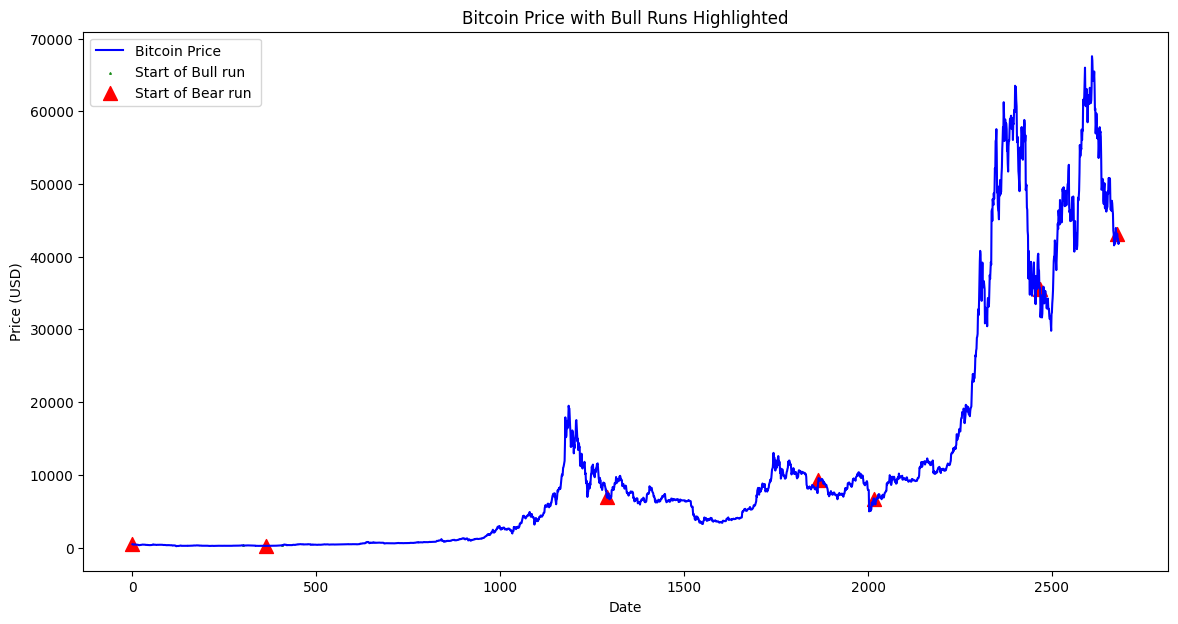

In [22]:
# Plotting the price and highlighting bull runs
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Bitcoin Price', color='blue')
plt.scatter(df[df["Bull Run Start"]].index,df[df["Bull Run Start"]]["Close"] ,label = "Start of Bull run ", color = "green",marker='^', s=1e00)
plt.scatter(df[df["Bear Run Start"]].index, df[df["Bear Run Start"]]["Close"], label = "Start of Bear run ", color = "red",marker='^', s=100)
plt.title('Bitcoin Price with Bull Runs Highlighted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [23]:
# Calculate future returns after buying at a certain month
df["Future 90d Return"] = df["Close"].pct_change(periods=90).shift(-90)  # 3-month return  
df["Future 180d Return"] = df["Close"].pct_change(periods=180).shift(-180)  # 6-month return  
df["Future 365d Return"] = df["Close"].pct_change(periods=365).shift(-365)  # 1-year return  

# Group data by month and find the median return
monthly_roi = df.groupby(df["Date"].dt.month)[["Future 90d Return", "Future 180d Return", "Future 365d Return"]].median()  

# Display results
print(monthly_roi)


      Future 90d Return  Future 180d Return  Future 365d Return
Date                                                           
1              0.081868            0.255259            1.200247
2              0.073537            0.240442            1.650348
3              0.362683            0.411644            1.328675
4              0.324376            0.449582            1.344007
5              0.241255            0.516975            1.712083
6              0.088892            0.441036            1.587860
7              0.003033            0.388342            1.554935
8              0.278262            0.749670            1.154122
9              0.276280            0.780242            0.761305
10             0.258454            0.460395            0.459731
11             0.185769            0.304004            0.866372
12             0.001066            0.401988            0.994643


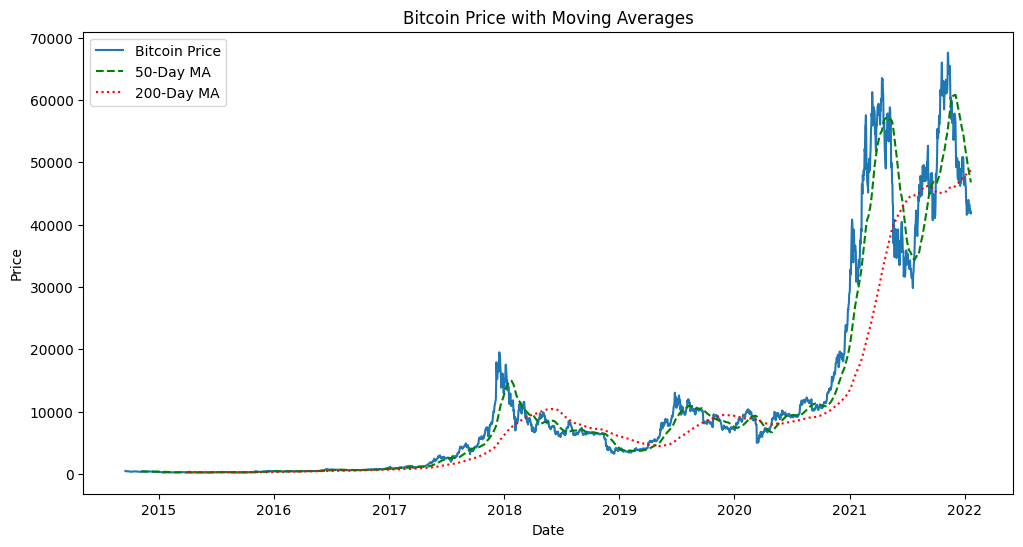

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Bitcoin Price")
plt.plot(df["Date"], df["Rolling mean 50"], label="50-Day MA", linestyle="dashed", color= "green")
plt.plot(df["Date"], df["Rolling mean 200"], label="200-Day MA", linestyle="dotted", color= "red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bitcoin Price with Moving Averages")
plt.show()


* 1. Detecting Bullish (Buy) and Bearish (Sell) Trends
The 50-day Moving Average (MA) shows the short-term trend.

The 200-day Moving Average (MA) shows the long-term trend.

When the 50-day MA crosses above the 200-day MA, it signals a bullish trend (a good time to buy).

When the 50-day MA crosses below the 200-day MA, it signals a bearish trend (a warning to sell or avoid buying).

* 2. Confirming a Bull Run (Buying Opportunities)
If Bitcoin's price is above both moving averages, it’s usually in an uptrend (strong market).

If Bitcoin recently crossed above the 200-day MA after a long downtrend, it could be the start of a bull market (ideal time to buy).

* 3. Identifying Market Bottoms (Best Time to Buy)
If Bitcoin’s price is far below both moving averages, it may indicate a market bottom, meaning the price is undervalued.

Historically, buying after a deep dip and when the price starts recovering leads to higher chances of profit.

  ## How to Use It for Investment Decisions:##
✅ Buy when the 50-day MA crosses above the 200-day MA (beginning of a bull run).
⚠️ Be cautious when the 50-day MA crosses below the 200-day MA (possible start of a bear market).
📉 Look for price recovery after big drops (historically strong buying opportunities).